In [ ]:
# Libraries required
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
from sklearn import linear_model
from sklearn import ensemble
from sklearn import tree
from sklearn import svm
import xgboost
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv("/content/WeatherAUS.csv")
data.head()
data.describe()
data.info()
data.shape
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3253
dtype: int64

<Axes: >

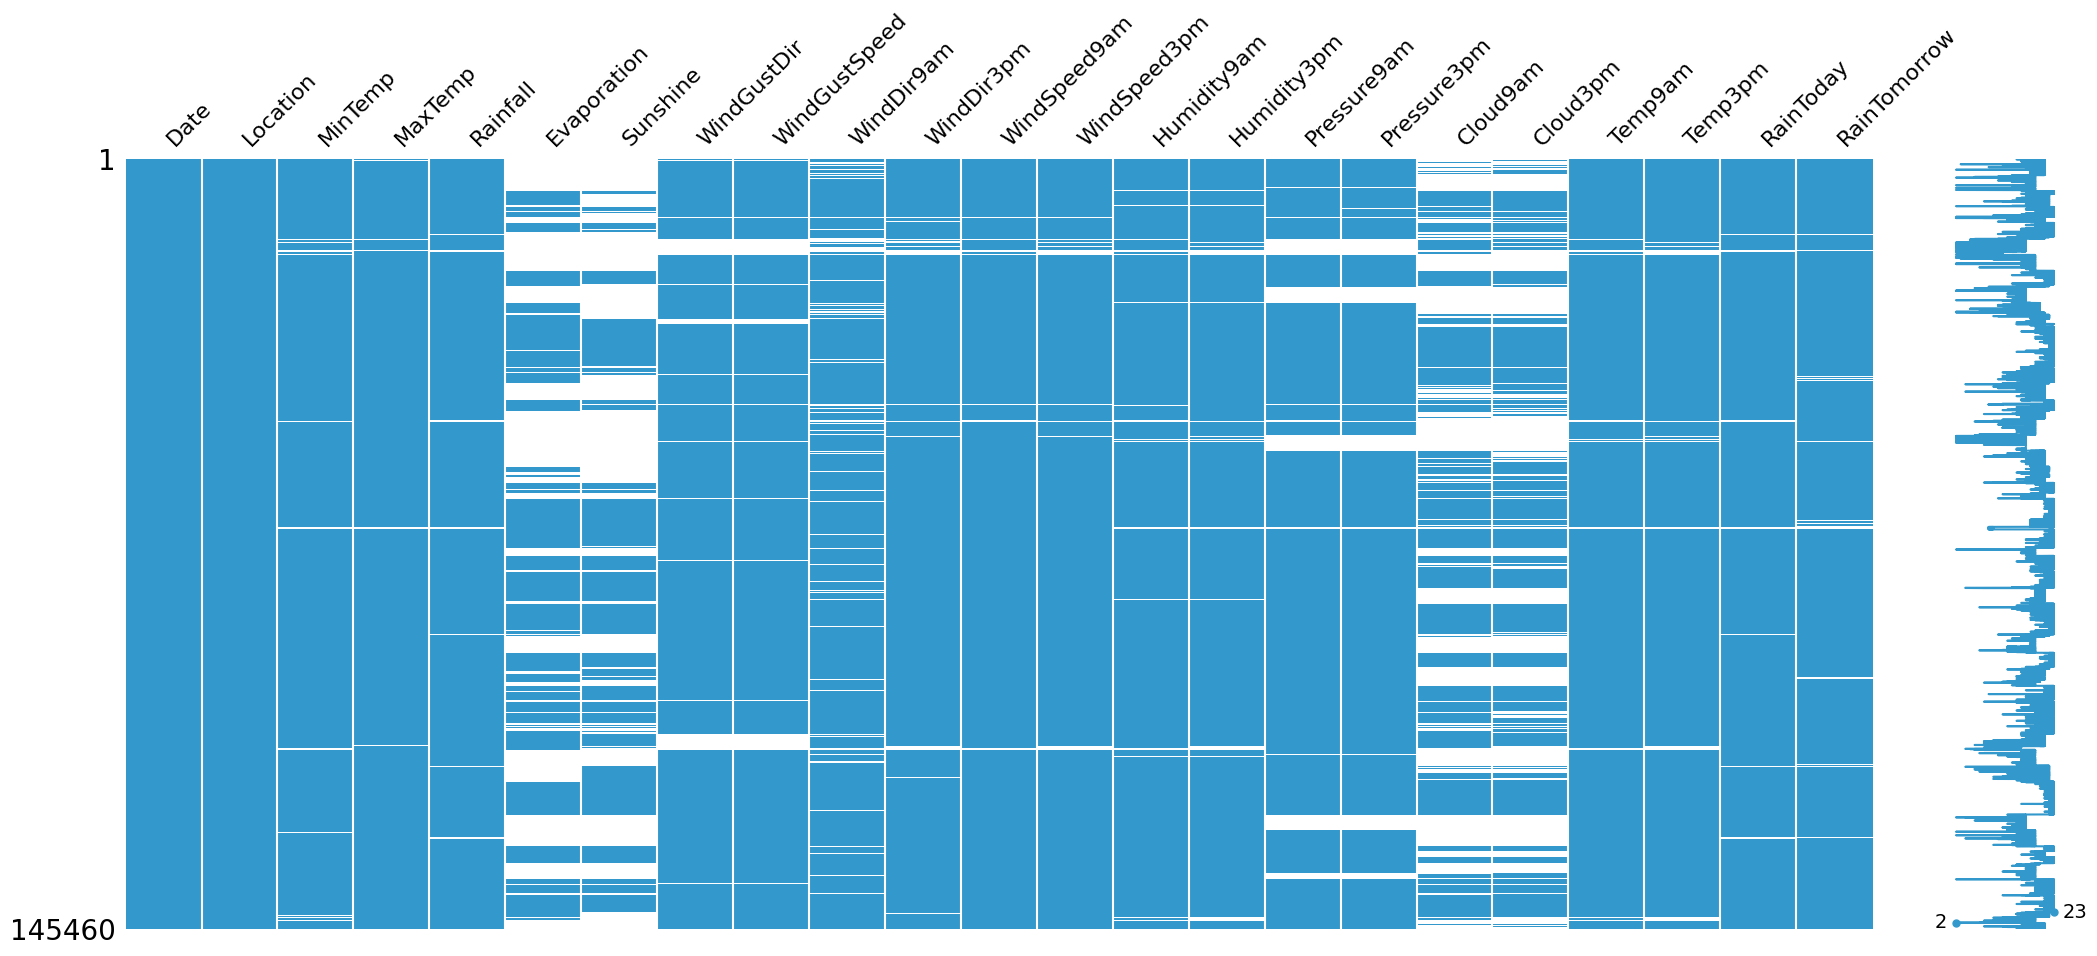

In [ ]:
import missingno as msno
msno.matrix(data, color=(0.2, 0.6, 0.8), fontsize=16)

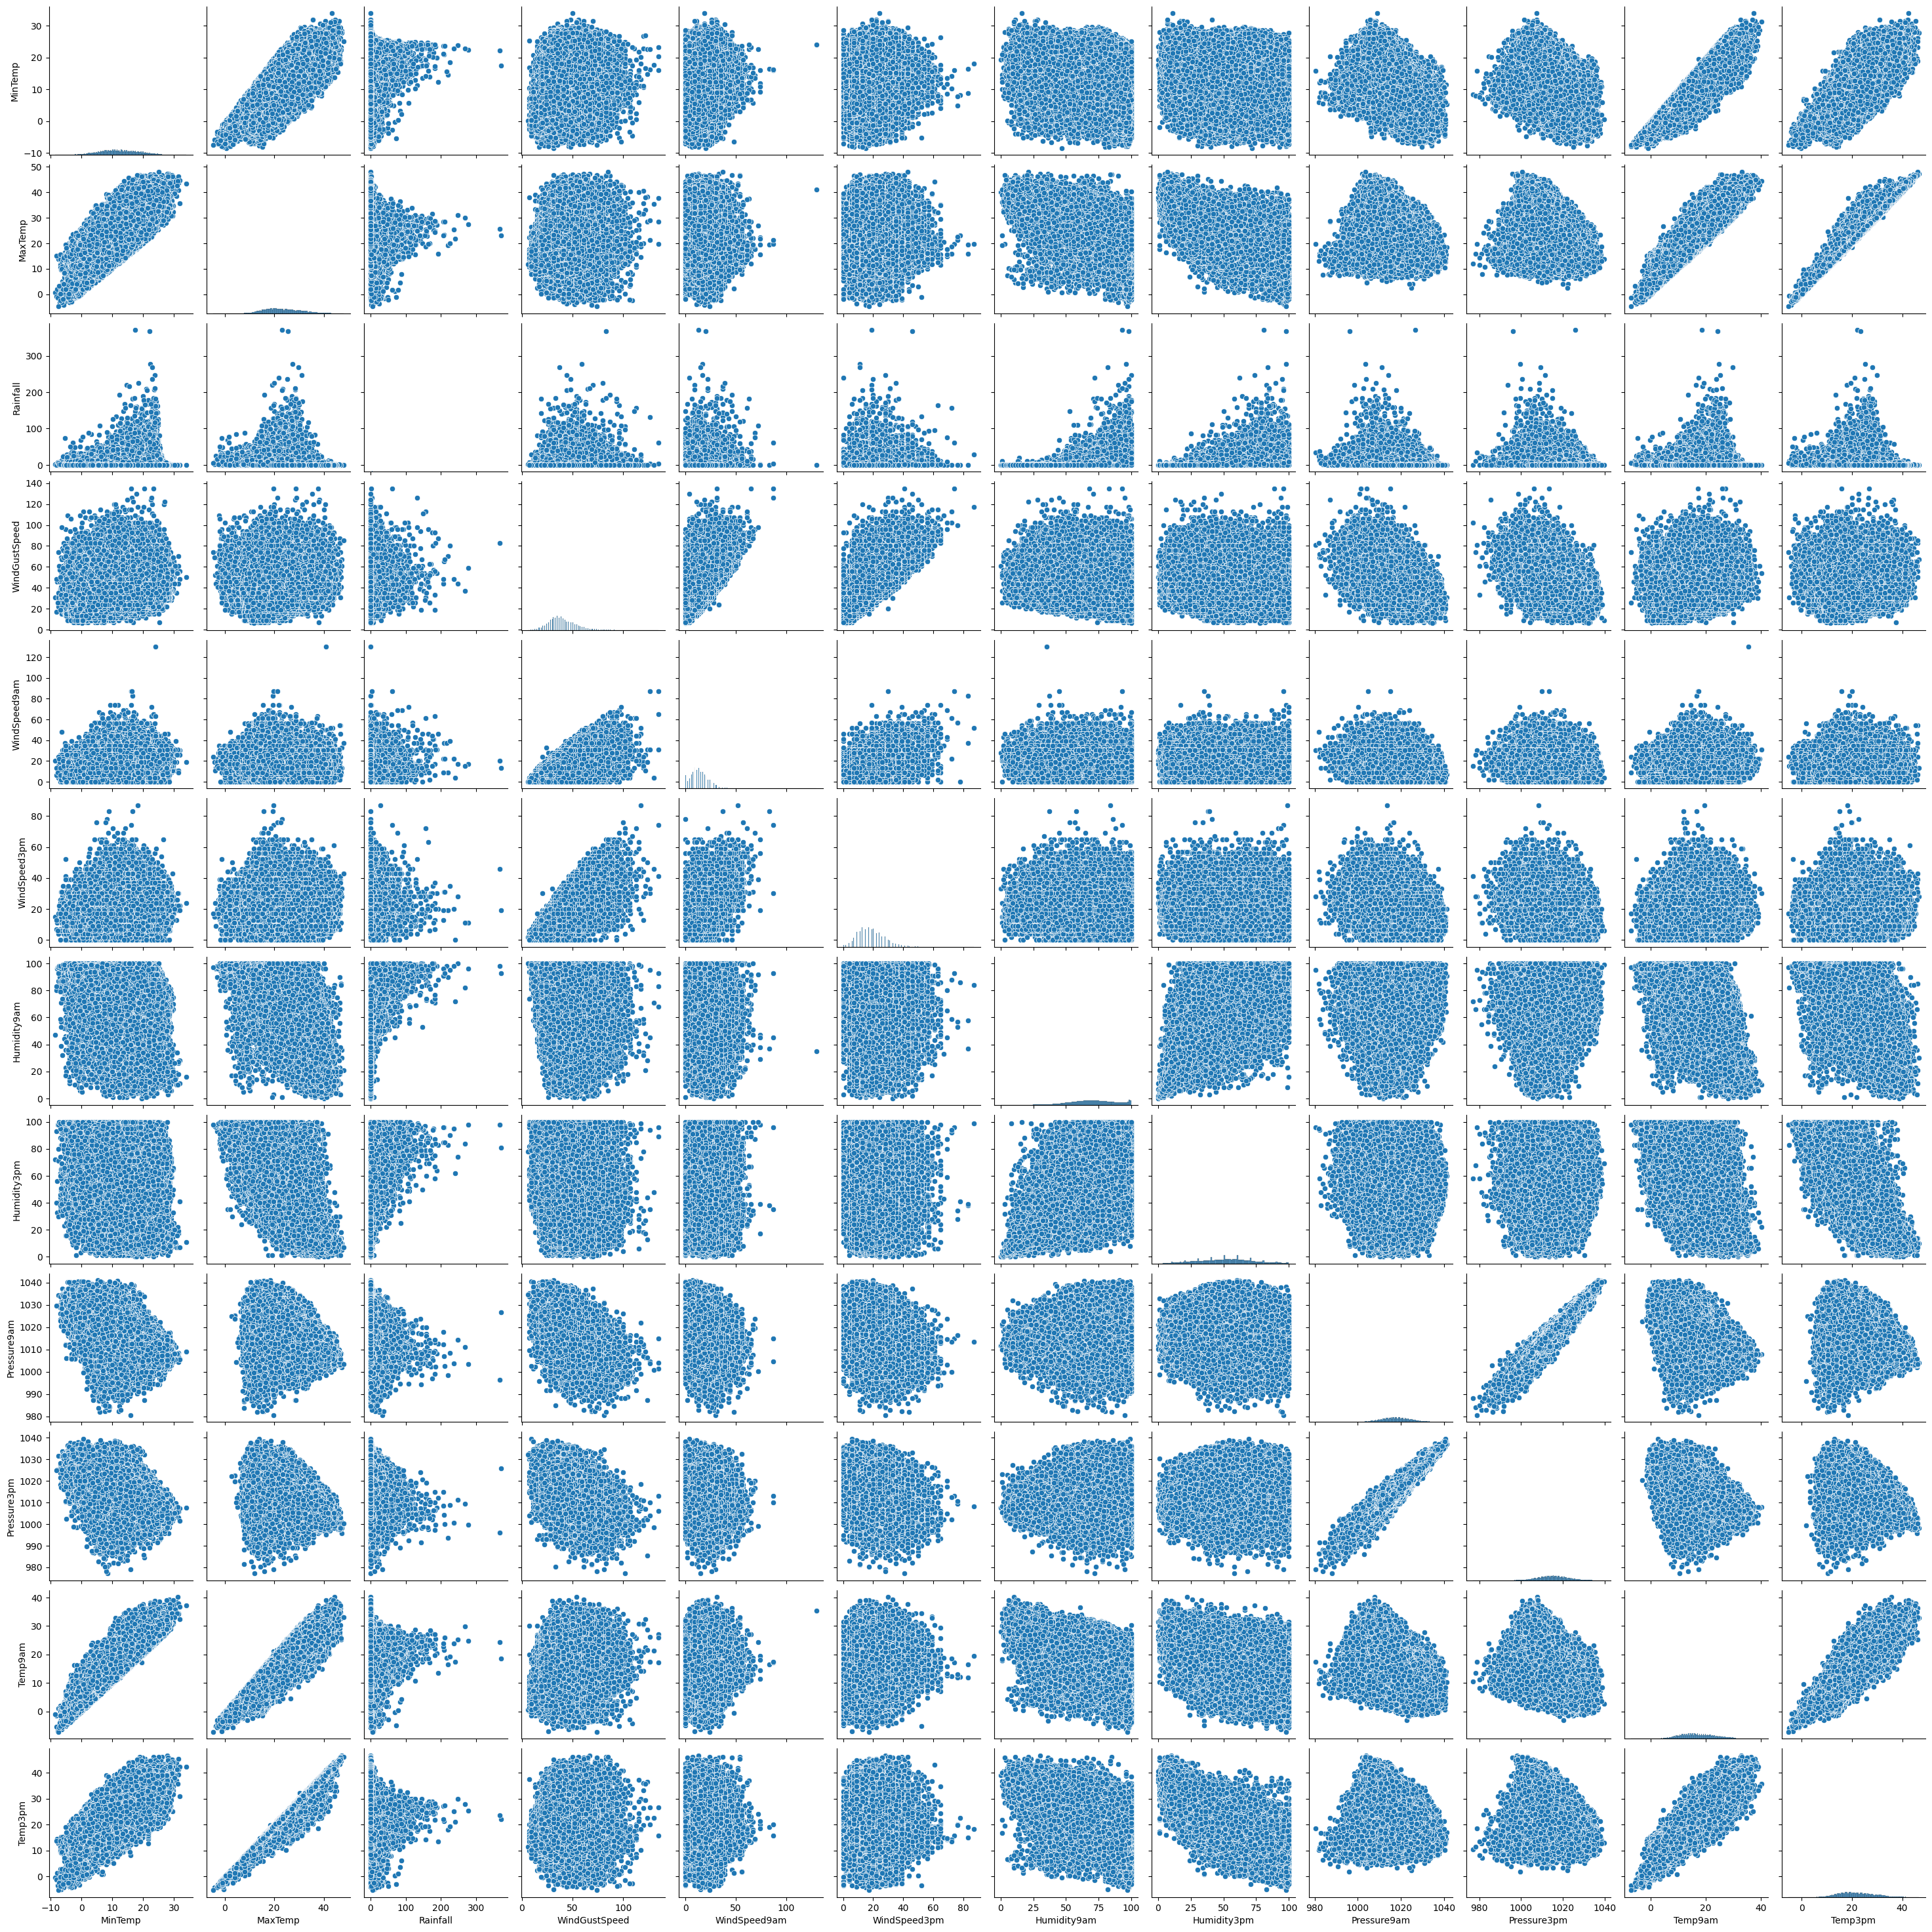

In [ ]:
cor = data.corr(numeric_only=True)
sns.pairplot(data)

<Axes: >

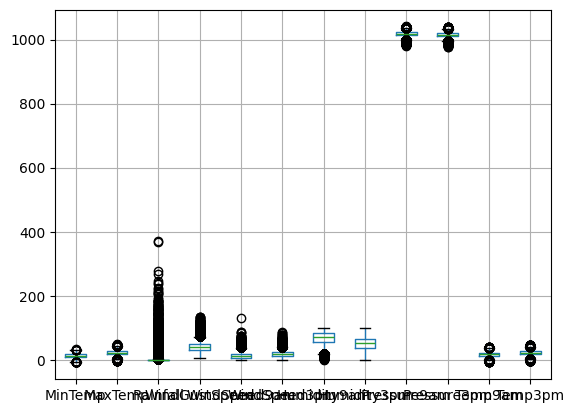

In [ ]:
data.boxplot()

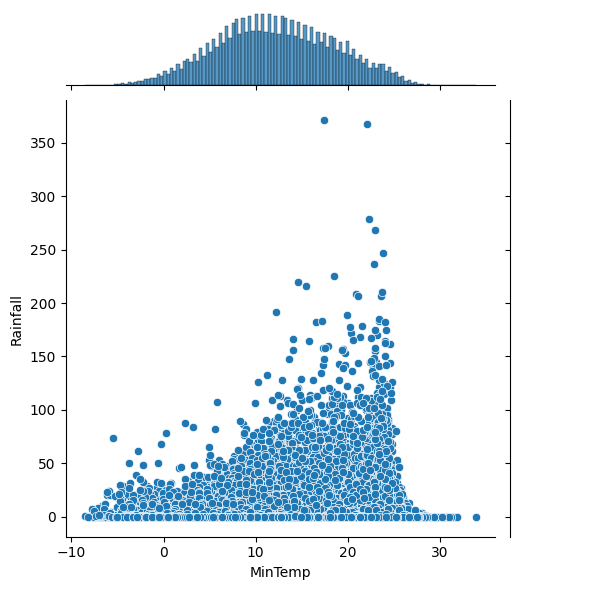

In [ ]:
sns.jointplot(x='MinTemp', y='Rainfall', data=data)

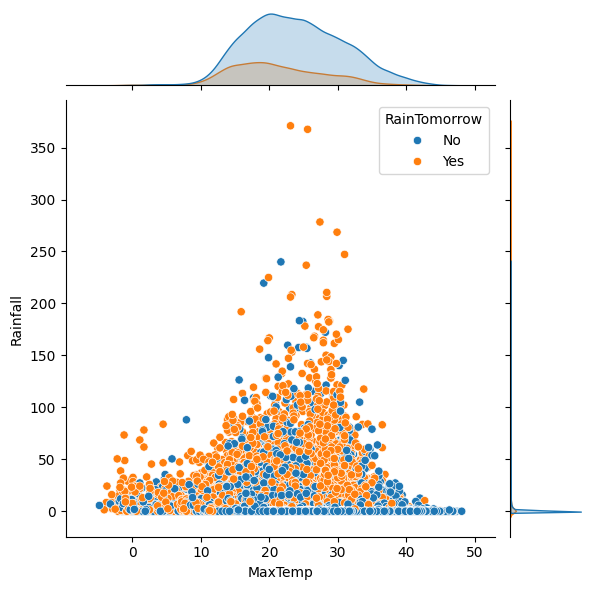

In [ ]:
sns.jointplot(x="MaxTemp", y="Rainfall", hue=data['RainTomorrow'], data=data)

<Axes: xlabel='RainTomorrow', ylabel='Count'>

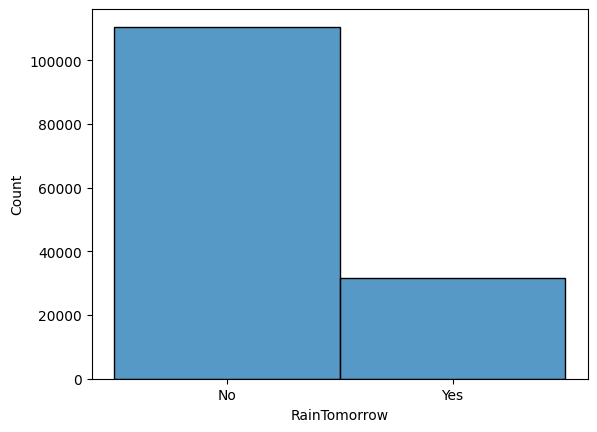

In [ ]:
sns.histplot(data['RainTomorrow'])

In [ ]:
#splitting x and y values
y = data['RainTomorrow']
x = data.drop('RainTomorrow', axis=1)

In [ ]:
names = x.columns

In [ ]:
names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm'],
      dtype='object')

In [ ]:
# Re-initialize x as a DataFrame to ensure .drop() works
x = data.drop('RainTomorrow', axis=1)

# Drop non-numeric columns 'Date' and 'Location' from x before scaling
x = x.drop(columns=['Date', 'Location'])

# Capture column names *before* scaling transforms x into a NumPy array
names = x.columns

sc = StandardScaler()
x = sc.fit_transform(x)

x = pd.DataFrame(x, columns=names)

In [ ]:
from sklearn import model_selection
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,test_size =0.2, random_state =0)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [ ]:
log_model = LogisticRegression(max_iter=1000)
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
svm_model = SVC()
gb_model = GradientBoostingClassifier()
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [ ]:
# Fit models
log_model.fit(x_train_clean_imputed, y_train_encoded)
dt_model.fit(x_train_clean_imputed, y_train_encoded)
rf_model.fit(x_train_clean_imputed, y_train_encoded)
svm_model.fit(x_train_clean_imputed, y_train_encoded)
gb_model.fit(x_train_clean_imputed, y_train_encoded)
xgb_model.fit(x_train_clean_imputed, y_train_encoded)

# Make predictions
log_pred = log_model.predict(x_test_clean_imputed)
dt_pred = dt_model.predict(x_test_clean_imputed)
rf_pred = rf_model.predict(x_test_clean_imputed)
svm_pred = svm_model.predict(x_test_clean_imputed)
gb_pred = gb_model.predict(x_test_clean_imputed)
xgb_pred = xgb_model.predict(x_test_clean_imputed)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:200: UserWarning: [18:41:43] WARNING: /__w/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
models = ['Logistic', 'Decision Tree', 'Random Forest', 'SVM', 'Gradient Boost', 'XGBoost']
scores = [
    accuracy_score(y_test_encoded, log_pred),
    accuracy_score(y_test_encoded, dt_pred),
    accuracy_score(y_test_encoded, rf_pred),
    accuracy_score(y_test_encoded, svm_pred),
    accuracy_score(y_test_encoded, gb_pred),
    accuracy_score(y_test_encoded, xgb_pred)
]

accuracy_df = pd.DataFrame({
    'Model': models,
    'Accuracy': scores
})

accuracy_df.sort_values(by='Accuracy', ascending=False)

Model  Accuracy
5         XGBoost  0.850931
2   Random Forest  0.850018
4  Gradient Boost  0.846643
3             SVM  0.846432
0        Logistic  0.838664
1   Decision Tree  0.778243

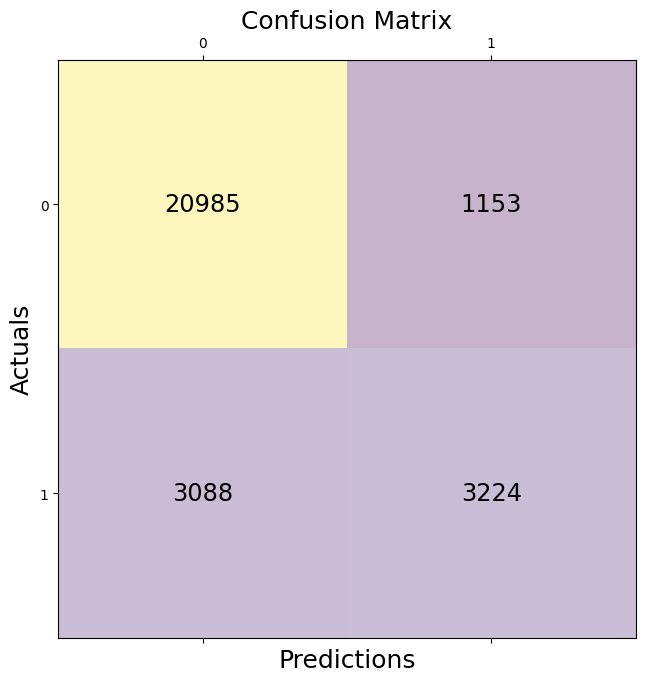

In [ ]:
conf_matrix = metrics.confusion_matrix(y_test_encoded, xgb_pred)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(j, i, str(conf_matrix[i, j]), va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

[[20985  1153]
 [ 3088  3224]]
Accuracy: 0.8509314586994727
Precision: 0.7365775645419237
Recall: 0.5107731305449936
F1-score: 0.6032369725886425


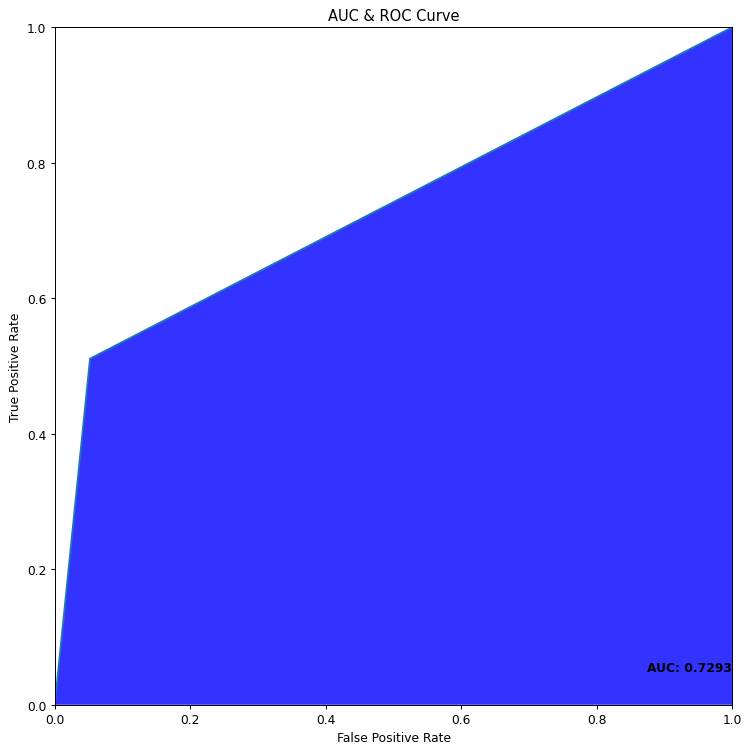

In [ ]:
print(conf_matrix)

# Calculate metrics for the best model (XGBoost)
Accuracy = metrics.accuracy_score(y_test_encoded, xgb_pred)
Precision = metrics.precision_score(y_test_encoded, xgb_pred)
Recall = metrics.recall_score(y_test_encoded, xgb_pred)
F1_score = metrics.f1_score(y_test_encoded, xgb_pred)
auc_score = metrics.roc_auc_score(y_test_encoded, xgb_pred)

print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("F1-score:", F1_score)

fpr, tpr, thresholds = metrics.roc_curve(y_test_encoded, xgb_pred)
plt.figure(figsize=(12, 10), dpi=88)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr) # Changed 'v' marker to a line plot
plt.fill_between(fpr, tpr, facecolor='blue', alpha=0.8)
plt.text(1, 0.05, f"AUC: {auc_score:.4f}", ha='right', fontsize=10, weight='bold', color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
import pickle
pickle.dump(xgb_model, open('rainfall.pkl', 'wb'))
# model
pickle.dump(le,open('encoder.pkl', 'wb'))
#encoder saving
pickle.dump(imputer,open('impter.pkl', 'wb'))
# imputer saving
pickle.dump(sc,open('scale.pkl', 'wb'))
#scaling the data